In [1]:
import pandas as pd
import plotly.express as px

In [20]:
from yellowbrick.classifier.confusion_matrix import confusion_matrix

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv("train_titanic.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


f(Features) -> Survived<br>
f(Pclass, Sex, Age, Sibsp, Parch, Fare, Embarked) -> Survived

# Feature Selection

In [4]:
df.drop(["Name", "Ticket", "Cabin"], axis=1,inplace =True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [6]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [7]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [8]:
onehot_preprocessor = OneHotEncoder(sparse_output=False)
onehot_preprocessor.fit(df[["Sex"]])

OneHotEncoder(sparse_output=False)

In [9]:
onehot_preprocessor.categories_

[array(['female', 'male'], dtype=object)]

In [10]:
transformed_embarked = onehot_preprocessor.transform(df[["Sex"]])
transformed_embarked = pd.DataFrame(transformed_embarked)
transformed_embarked.head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [11]:
df["Sex"].head()

PassengerId
1      male
2    female
3    female
4    female
5      male
Name: Sex, dtype: object

|female|male|
|---|---|
|1|0|
|1|0|
|0|1|
|1|0|
|1|0

In [12]:
onehot_preprocessor = OneHotEncoder(sparse_output=False)
onehot_preprocessor.fit(df[["Embarked"]])

OneHotEncoder(sparse_output=False)

In [13]:
onehot_preprocessor.categories_

[array(['C', 'Q', 'S', nan], dtype=object)]

In [14]:
transformed_embarked = onehot_preprocessor.transform(df[["Embarked"]])
transformed_embarked = pd.DataFrame(transformed_embarked)
transformed_embarked.head()

,0,1,2,3
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [15]:
df["Embarked"].head(2)

PassengerId
1    S
2    C
Name: Embarked, dtype: object

Categorical Column(3 categories) -> One Hot Encoding -> 3 Column<br>
Categorical Column(2 categories) -> One Hot Encoding -> 2 Column

|'C'| 'Q'| 'S'|
|---|---|---|
|1|0|0|
|0|0|1|
|0|1|0|

Passenger Id =Q

In [16]:
df.dropna(inplace=True)

In [17]:
X = df[["Pclass", "Sex", "Age"]]
X.loc[:,"Sex"] = X["Sex"].map({"male":0,"female":1})
y = df["Survived"]
X.head()

,Pclass,Sex,Age
PassengerId,,,
1,3,0,22.0
2,1,1,38.0
3,3,1,26.0
4,1,1,35.0
5,3,0,35.0


- Ground Truth
- Truth(Binary Class) - 0/1 Prediction

Supervised Ml Model/ Classification Model

f(Pclass, Sex, Age) -> Survived(0,1/Survived,Didnt Survive)

In [9]:

from sklearn.tree import DecisionTreeClassifier

import dtreeviz

X = df[["Pclass", "Sex", "Age"]]
X.loc[:,"Sex"] = X["Sex"].map({"male":0,"female":1})
y = df["Survived"] #Ground Truth


clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

viz_model = dtreeviz.model(clf,
                           X_train=X, y_train=y,
                           feature_names=X.columns,
                           target_name='Survived',
                           class_names=[ "Dead","Survived"],\
                           )

v = viz_model.view()     # render as SVG into internal object 
 

/Users/satyapattnaik/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


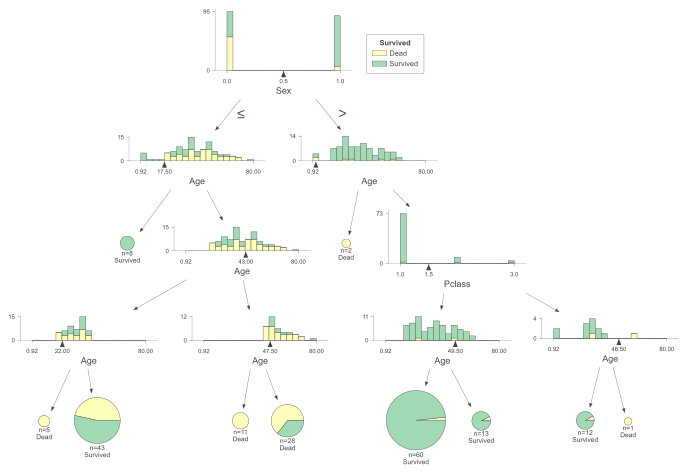

In [10]:
v

In [18]:

from sklearn.tree import DecisionTreeClassifier

import dtreeviz

X = df[["Pclass", "Sex", "Age"]]
#[Outlook, temp, humidity, wind]
X.loc[:,"Sex"] = X["Sex"].map({"male":0,"female":1})
y = df["Survived"] #Ground Truth
#Decision


clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X, y)

viz_model = dtreeviz.model(clf,
                           X_train=X, y_train=y,
                           feature_names=X.columns,
                           target_name='Survived',
                           class_names=[ "Dead","Survived"],\
                           )

v = viz_model.view()     # render as SVG into internal object 
 

/Users/satyapattnaik/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


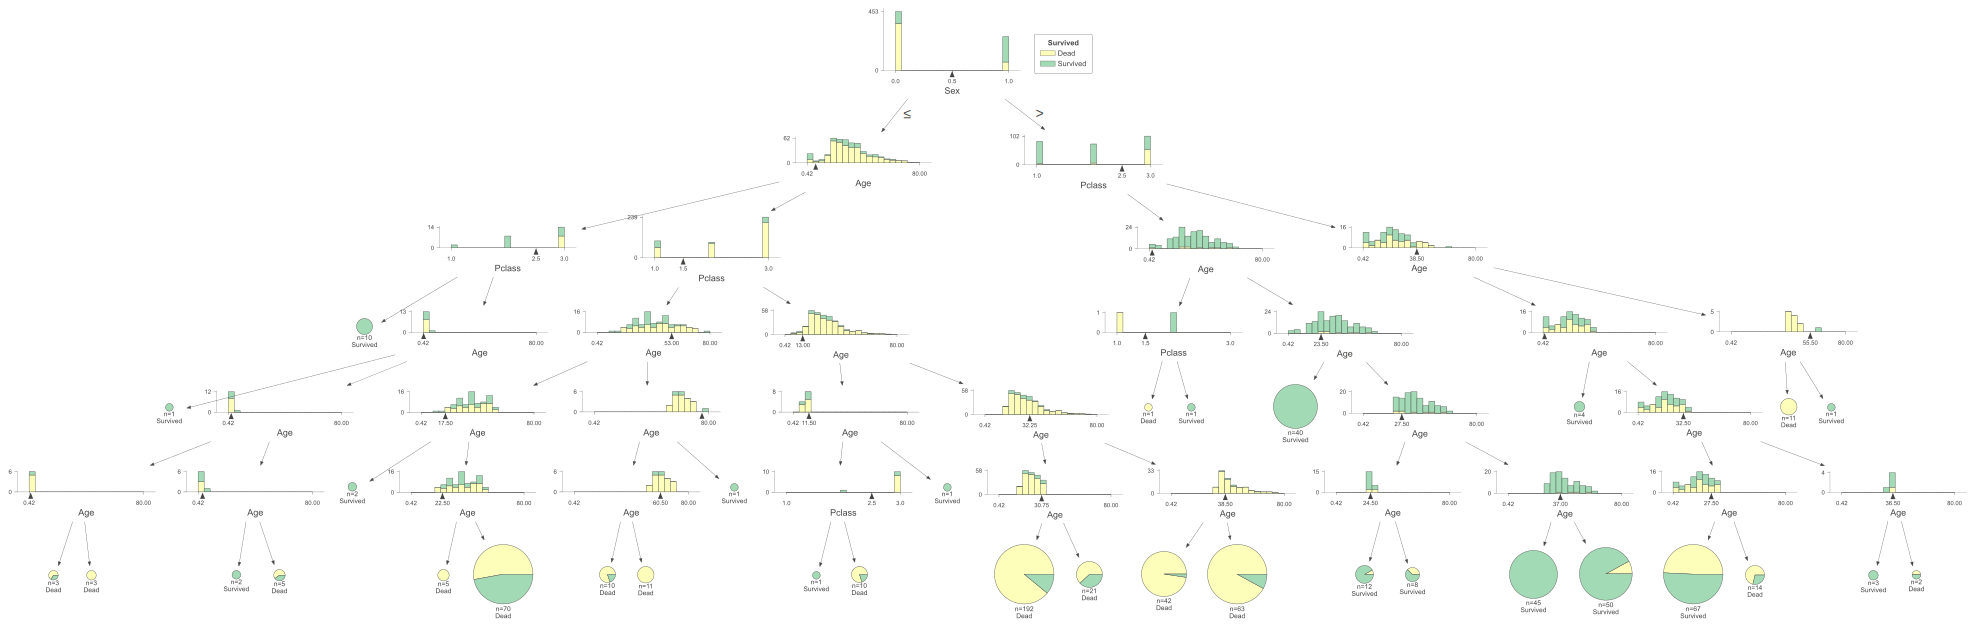

In [19]:
v

In [21]:
df["Age"]

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
886    39.0
887    27.0
888    19.0
890    26.0
891    32.0
Name: Age, Length: 712, dtype: float64

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
polynomial_features.fit(df[["Age","Fare"]])

PolynomialFeatures(include_bias=False)

In [39]:
22**3

10648

In [40]:
polynomial_features.transform(df[["Age","Fare"]]).shape

(712, 5)

In [38]:
from sklearn.linear_model import LogisticRegression


In [81]:
from yellowbrick.classifier.classification_report import classification_report

In [85]:
from yellowbrick.classifier.prcurve import precision_recall_curve

# Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df[["Pclass", "Sex", "Age"]]
#[Outlook, temp, humidity, wind]
X.loc[:,"Sex"] = X["Sex"].map({"male":0,"female":1})
y = df["Survived"] #Ground Truth
#Decision

# Splitted Dataset

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80)

# Fit/Train the model

In [75]:
model = DecisionTreeClassifier(max_depth=5)

In [76]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [77]:
X_train.shape,X_test.shape

((569, 3), (143, 3))

In [78]:
569+143

712

In [79]:
510/569

0.8963093145869947

# Evaluate Model

/Users/satyapattnaik/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


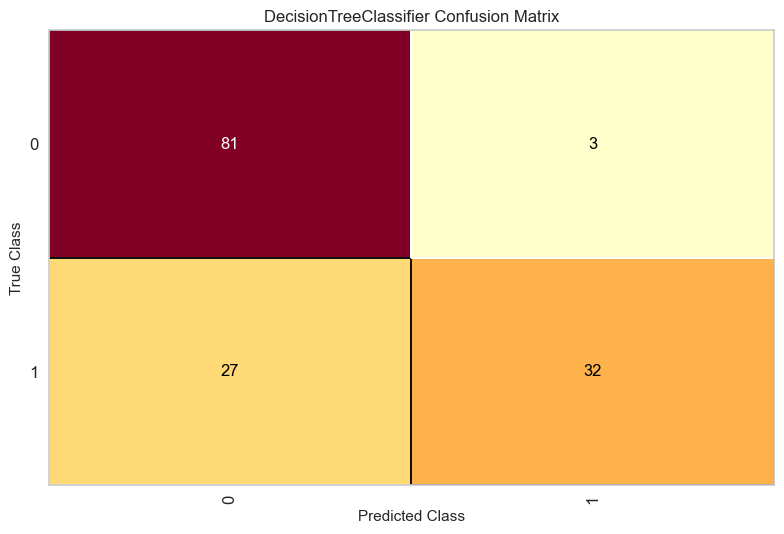

ConfusionMatrix(ax=<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x15ae75960>,
                estimator=DecisionTreeClassifier(max_depth=5))

In [80]:
confusion_matrix(model,X_train,y_train,X_test,y_test)

In [84]:
model.predict_proba(X_test)[:,1]

array([0.48529412, 0.5       , 0.13636364, 1.        , 0.07      ,
       0.13636364, 0.13636364, 0.07      , 0.07      , 1.        ,
       0.5       , 0.13636364, 0.13636364, 0.13636364, 0.33333333,
       0.13636364, 0.07      , 0.07      , 0.48529412, 0.13636364,
       1.        , 0.71428571, 0.5       , 0.13636364, 0.07      ,
       0.94915254, 0.5       , 0.48529412, 0.07      , 0.94915254,
       0.5       , 0.5       , 0.        , 0.07      , 0.71428571,
       0.48529412, 0.07      , 0.13636364, 0.13636364, 0.34482759,
       0.94915254, 0.13636364, 0.07      , 0.13636364, 0.07      ,
       0.        , 0.94915254, 0.48529412, 1.        , 0.34482759,
       0.34482759, 0.5       , 0.07      , 0.07      , 0.9375    ,
       0.13636364, 0.9375    , 0.94915254, 0.34482759, 0.94915254,
       0.07      , 0.13636364, 1.        , 0.5       , 0.07      ,
       0.13636364, 0.07      , 0.875     , 0.48529412, 0.48529412,
       0.07      , 1.        , 1.        , 0.48529412, 0.13636

/Users/satyapattnaik/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


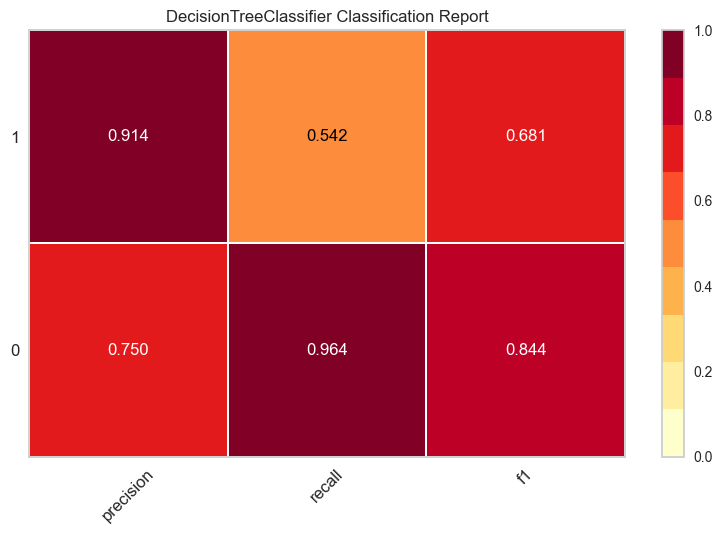

ClassificationReport(ax=<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x15a9d0a90>,
                     estimator=DecisionTreeClassifier(max_depth=5))

In [82]:
classification_report(model,X_train,y_train,X_test,y_test)

/Users/satyapattnaik/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


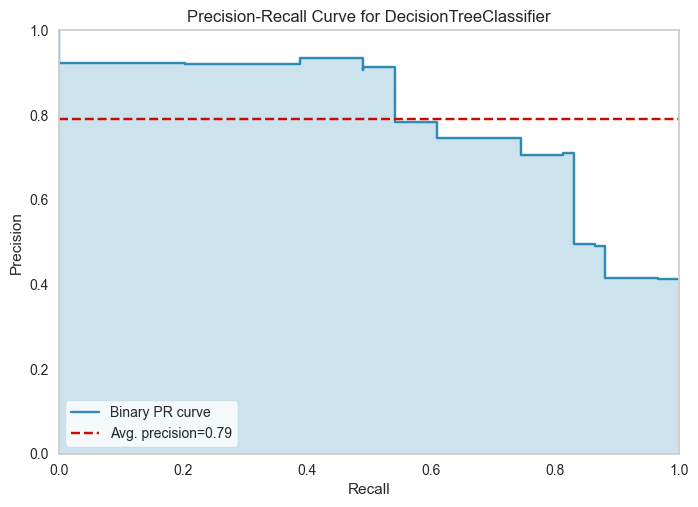

PrecisionRecallCurve(ax=<Axes: title={'center': 'Precision-Recall Curve for DecisionTreeClassifier'}, xlabel='Recall', ylabel='Precision'>,
                     estimator=DecisionTreeClassifier(max_depth=5),
                     iso_f1_values={0.2, 0.4, 0.6, 0.8})

In [86]:
precision_recall_curve(model,X_train,y_train,X_test,y_test)

# Define a Model

In [39]:
model = LogisticRegression()

In [41]:
df.dropna(inplace = True)

# Train

In [42]:
model.fit(df[["Age"]], df["Survived"])

LogisticRegression()

# Predict

In [43]:
model.predict(df[["Age"]].head(5))

array([0, 0, 0, 0, 0])

In [45]:
df[["Age","Survived"]].head()

,Age,Survived
PassengerId,,
1,22.0,0
2,38.0,1
3,26.0,1
4,35.0,1
5,35.0,0


In [49]:
!pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/94/d9/b15f66bcbdd2fb2c41806d9e8f53ee6f0c88c5cc2703f6e3b420dd207620/scikit_learn-1.4.1.post1-cp310-cp310-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0


In [46]:
from sklearn.decomposition import PCA

In [47]:
pca= PCA()